<a href="https://colab.research.google.com/github/Oussoubicodes/CS4287-Assignment-1/blob/main/CS4287_Prj1_20242905_20250762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Oussoubi Niakate - 20242905
#Dennis Kolomiyets - 20250762

#Runs with no errors excluding the Model part

Imports

In [3]:
from IPython.core.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import csv
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Visualising the Data

In [4]:

#Fetch data through pandas
houses = pd.read_csv("Housing.csv")

#Displaying the first few rows of the data
display(houses.head())

#Dataset statistics
houses.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


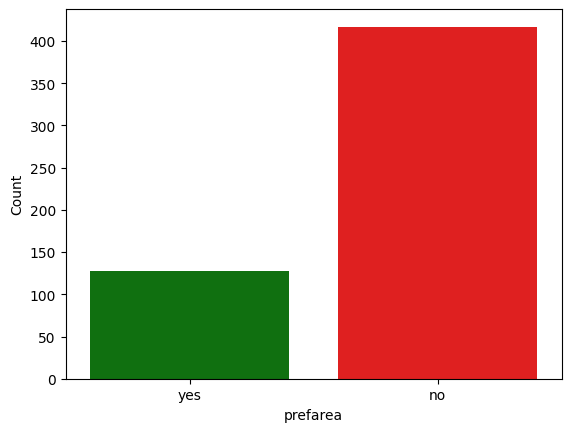

In [5]:
#Showing the difference between houses located in a preferred area and not
my_colours = {"yes": 'green', "no": 'red'}
sbn.countplot(data=houses, x='prefarea', palette = my_colours)
plt.ylabel('Count')
plt.show()


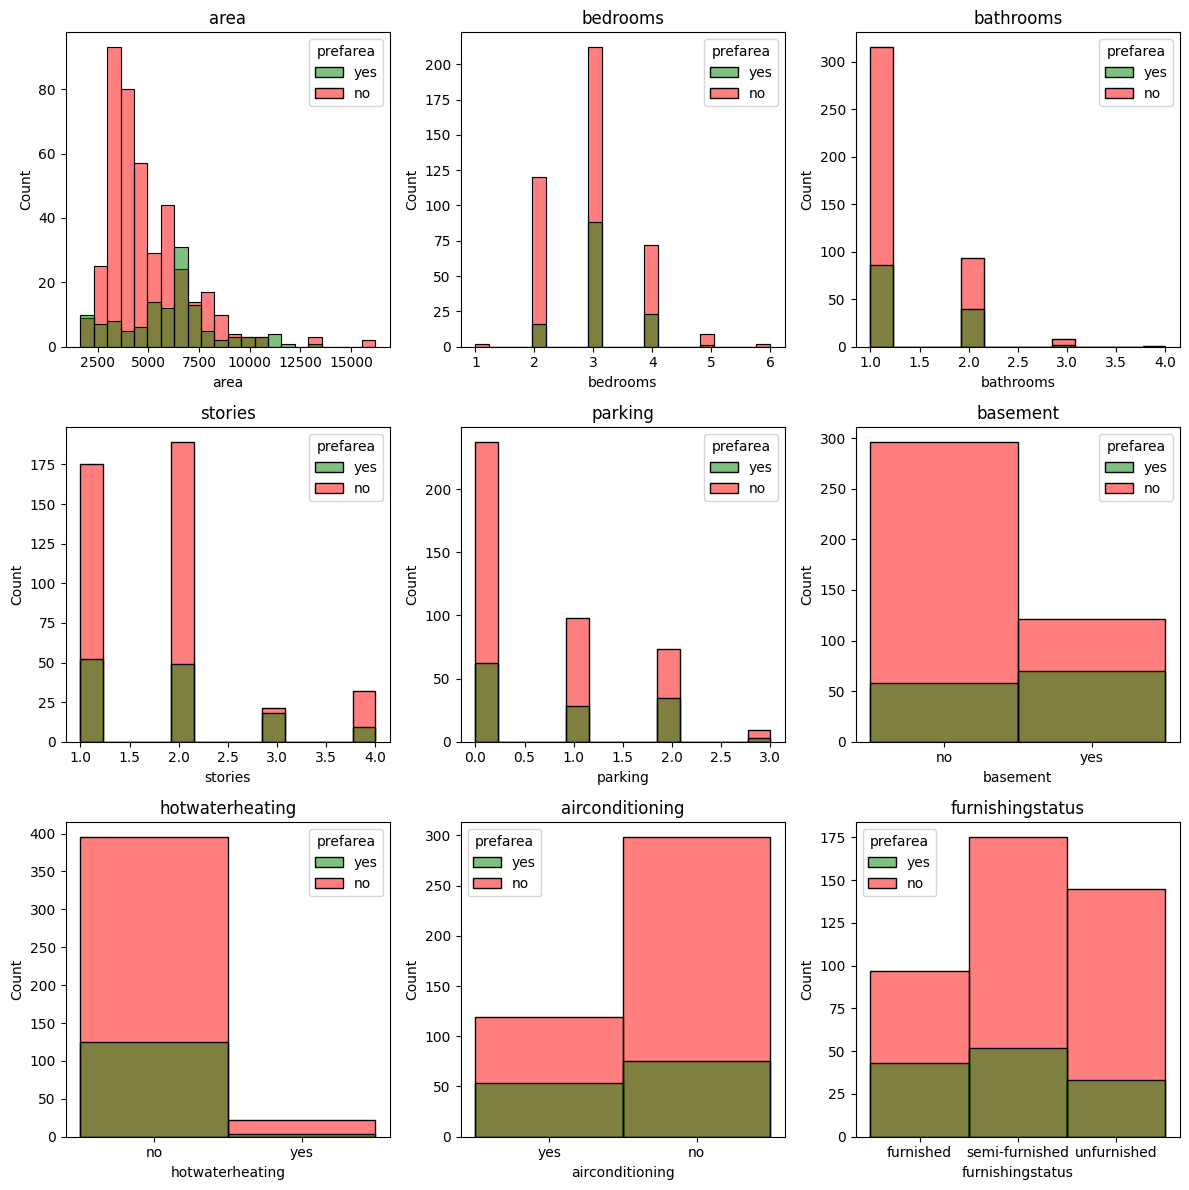

In [6]:
#The different attributes that will be plotted
attri=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'basement',
       'hotwaterheating', 'airconditioning', 'furnishingstatus']

#Determines the size of each subplot
fig = plt.figure(figsize=(12,12))

#Using a loop to plot the various different attributes
for i in range(len(attri)):
    plt.subplot(3,3,i+1)
    plt.title(attri[i])
    sbn.histplot(data=houses,x=houses[attri[i]],hue='prefarea', palette = my_colours)
plt.tight_layout()
plt.show()

Normalising the data

In [10]:

houses_normalised = houses.copy()

#Identifying the columns with numerical values
houses_numer = houses.select_dtypes(include=[np.number])

#Finds the max value in each column
col_maxes = houses_numer.max()

#Finds the overall max value among all columns
houses_numer_max = col_maxes.max()

#Normalises data to a value between 0 and 1
houses_numer_normalised = houses_numer / houses_numer_max

#Reassigns normalised values back to their corresponding columns
houses_normalised[houses_numer_normalised.columns] = houses_numer_normalised

#Checking if it's been normalised
display("Normalised Dataset", houses_normalised)

'Normalised Dataset'

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.000558,3.007519e-07,1.503759e-07,2.255639e-07,yes,no,no,no,yes,1.503759e-07,yes,furnished
1,0.921053,0.000674,3.007519e-07,3.007519e-07,3.007519e-07,yes,no,no,no,yes,2.255639e-07,no,furnished
2,0.921053,0.000749,2.255639e-07,1.503759e-07,1.503759e-07,yes,no,yes,no,no,1.503759e-07,yes,semi-furnished
3,0.918421,0.000564,3.007519e-07,1.503759e-07,1.503759e-07,yes,no,yes,no,yes,2.255639e-07,yes,furnished
4,0.857895,0.000558,3.007519e-07,7.518797e-08,1.503759e-07,yes,yes,yes,no,yes,1.503759e-07,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.136842,0.000226,1.503759e-07,7.518797e-08,7.518797e-08,yes,no,yes,no,no,1.503759e-07,no,unfurnished
541,0.132868,0.000180,2.255639e-07,7.518797e-08,7.518797e-08,no,no,no,no,no,0.000000e+00,no,semi-furnished
542,0.131579,0.000272,1.503759e-07,7.518797e-08,7.518797e-08,yes,no,no,no,no,0.000000e+00,no,unfurnished
543,0.131579,0.000219,2.255639e-07,7.518797e-08,7.518797e-08,no,no,no,no,no,0.000000e+00,no,furnished


Training sets

In [8]:
#Specifies seed for reproducibility
np.random.seed(1671)

#Shuffles the dataset
houses_normalised = houses_normalised.iloc[np.random.permutation(len(houses_normalised))]

#Splits dataset to training and testing; 80% training and 20% testing
training = houses_normalised.sample(frac = 0.8)
testing = houses_normalised.drop(training.index)

#Gives the number of rows in training and test
X_count = training.shape[0]
Y_count = testing.shape[0]

#Training input and output list
X_train = []
Y_train = []

#Test input and output lists
X_test = []
Y_test = []

#Loops through the dataframe and separates inputs and outputs for training and testing
for index, row in training.iterrows():
    X_train.append([row['area'],row['bedrooms'],row['bathrooms'], row['stories'], row['parking']])
    Y_train.append([row['prefarea']])

for index, row in testing.iterrows():
    X_test.append([row['area'],row['bedrooms'],row['bathrooms'], row['stories'], row['parking']])
    Y_test.append([row['prefarea']])

#Converts to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print("\nTraining and Test Datasets:\n")
print("\nX_train row[0]:\n", X_train[0], "\nShape:", X_train.shape)
print("\nY_train row[0]:\n", Y_train[0], "\nShape:", Y_train.shape)
print("\nX_test row[0]:\n", X_test[0], "\nShape:", X_test.shape)
print("\nY_test row[0]:\n", Y_test[0], "\nShape:", Y_test.shape)

INPUT=X_train.shape[1]



Training and Test Datasets:


X_train row[0]:
 [3.60902256e-04 1.50375940e-07 7.51879699e-08 7.51879699e-08
 0.00000000e+00] 
Shape: (436, 5)

Y_train row[0]:
 ['no'] 
Shape: (436, 1)

X_test row[0]:
 [2.25563910e-04 3.00751880e-07 7.51879699e-08 2.25563910e-07
 1.50375940e-07] 
Shape: (109, 5)

Y_test row[0]:
 ['no'] 
Shape: (109, 1)


Model

In [9]:
import tensorflow as tf
import numpy as np

# Defining hyperparameters
EPOCHS = 200
BATCH_SIZE = 16
VALIDATION_SPLIT = 0.2
OPTIMISER = 'adam'
LOSS_FUNCTION = 'binary_crossentropy'


# Create a simple perceptron with "adam" optimizer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(INPUT,)),
    tf.keras.layers.Dropout(0.5),  # Add a dropout layer with a dropout rate of 0.5
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Add another dropout layer with a dropout rate of 0.3
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the "adam" optimizer and binary cross-entropy loss
model.compile(optimizer=OPTIMISER, loss=LOSS_FUNCTION, metrics=['accuracy'])

# Training the model using the training data and validating it on the test data
resHistory = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, Y_test))


Epoch 1/200


UnimplementedError: ignored